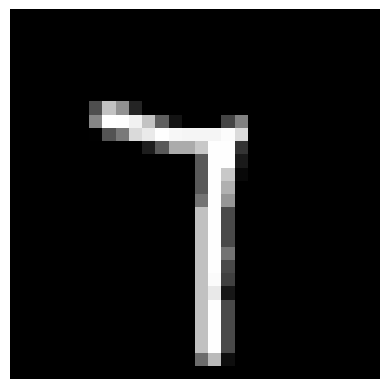

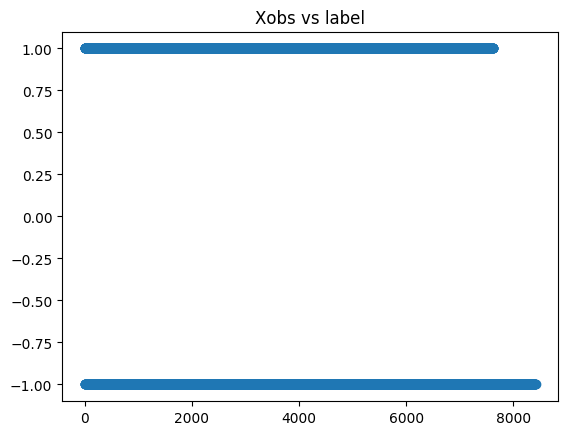

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from scipy.spatial.distance import cdist

(train_images, train_labels), _ = mnist.load_data()
indices_1_7 = np.where((train_labels == 1) | (train_labels == 7))[0]
images_1_7 = train_images[indices_1_7]
train_labels_1_7 = train_labels[indices_1_7]


# Extract the images and labels corresponding to 1 and 7, 13007 in total
def display_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
display_image(images_1_7[12232])
indices_1 = np.where(train_labels[indices_1_7] == 1)[0]
indices_7 = np.where(train_labels[indices_1_7] == 7)[0]
Xobs_1 = indices_1[:4000].reshape(-1,1)
Xobs_7 = indices_7[:4000].reshape(-1,1)
Xobs = np.vstack((Xobs_1,Xobs_7))
label = np.zeros(8000) - 1
label[:4000] = np.ones(4000)
plt.scatter(Xobs,label)
plt.title("Xobs vs label")
plt.show()

In [ ]:
def RBFinterp(Xobs, f, XI, eps=0.01, lam=0.1):
  # Given data f(x,y)
  # interpolate to new points s(xI, yI)

  # find pairwise distance
  D = cdist(Xobs, Xobs, metric='euclidean')

  # setup the linear system
  A = np.exp(-D * eps)
  c = np.linalg.solve(A + lam*np.eye(A.shape[0]), f)

  DI = cdist(XI, Xobs, metric='euclidean')
  AI = np.exp(-DI * eps)

  fI = AI @ c
  return fI

In [ ]:
eps_values = [0.001, 0.01, 0.1, 1.0]    # Now includes original best eps
lam_values = [0.001, 0.01, 0.1, 1.0]    # Now includes original best lam

best_eps = None
best_lam = None
best_mse = np.inf

subset_size = 1000
X_subset = X_pixels[:subset_size]
y_subset = y[:subset_size]

kf = KFold(n_splits=3, shuffle=True)

for eps in eps_values:
    for lam in lam_values:
        mse_scores = []

        for train_index, val_index in kf.split(Xobs):
            X_train, X_val = Xobs[train_index], Xobs[val_index]
            y_train, y_val = label[train_index], label[val_index]

            try:
                y_pred = RBFinterp(X_train, y_train, X_val, eps=eps, lam=lam)
                mse = mean_squared_error(y_val, y_pred)
                mse_scores.append(mse)
            except np.linalg.LinAlgError:
                continue

        if not mse_scores:
            continue

        avg_mse = np.mean(mse_scores)
        if avg_mse < best_mse:
            best_mse = avg_mse
            best_eps = eps
            best_lam = lam

print(f"Best eps: {best_eps}")
print(f"Best lam: {best_lam}")
print(f"Best MSE: {best_mse}")

Best eps: 0.01
Best lam: 0.1
Best MSE: 1.095145704456633


The minimum error is arounf 1.095 when we take the best lam 0.1.

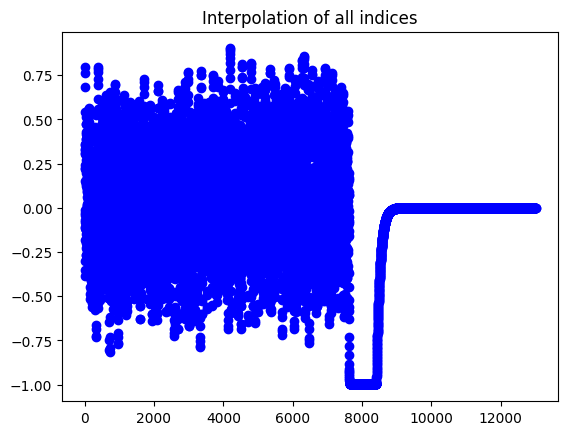

In [ ]:
XI = np.vstack((indices_1.reshape(-1,1),indices_7.reshape(-1,1)))
fI = RBFinterp(Xobs, label, XI, eps=best_eps, lam=best_lam)

plt.scatter(XI,fI,marker='o',color='blue')
plt.title("Interpolation of all indices")
plt.show()

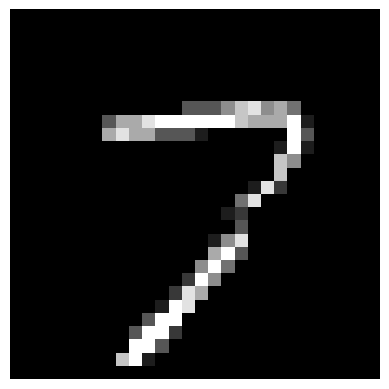

Interpolated value: [-1.29255266e-07]


In [ ]:
display_image(images_1_7[10000])
interpolated_value = RBFinterp(Xobs, label,np.array([[10000]]), eps=best_eps, lam=best_lam)
print(f"Interpolated value: {interpolated_value}") # GOOD PREDICTION

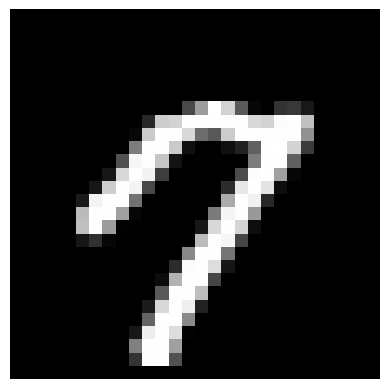

Interpolated value: [-2.214563e-18]


In [ ]:
display_image(images_1_7[12479])
interpolated_value = RBFinterp(Xobs, label,np.array([[12479]]), eps=best_eps, lam=best_lam)
print(f"Interpolated value: {interpolated_value}") #ALSO GOOD PREDICTION

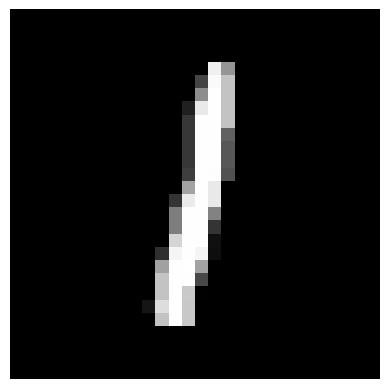

Interpolated value: [-1.64740968e-08]


In [ ]:
display_image(images_1_7[10206])
interpolated_value = RBFinterp(Xobs, label,np.array([[10206]]), eps=best_eps, lam=best_lam)
print(f"Interpolated value: {interpolated_value}") # BAD PREDICTION

"interpolation_val close to label -1 (negative number) means 7", "interpolation_val close to label 1 (positive number) means 1".